# **Data Cleaning**

## **Import Package**

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import additional files with statistical functions
import sys
import os

### **Data**

In [34]:
data = pd.read_excel('DATA AR JANUARI - MEI 2023 - FIX - Copy.xlsx')
data.head()

,Nomor,AR_Type,Cust Name,Segment,Bidang_Baku,Tipe,Layanan,Bandwidth,Biaya_Sewa,Address Terminating,SBU_Ter,AL_Status,Kabupaten/Kota,Wilayah
0,1,Change Tariff,DINAS KOMUNIKASI DAN INFORMATIKA STATISTIK DAN...,Government,NaN,NaN,Bronze,Units,190000.0,"(Kantor Kecamatan Singgahan) Jojogan, Mulyoagu...",SBU REG JAWA BAGIAN TIMUR,Active,Kabupaten,Tuban
1,2,Change Tariff,DINAS KOMUNIKASI DAN INFORMATIKA STATISTIK DAN...,Government,NaN,NaN,Bronze,Units,190000.0,(Kantor Kecamatan Plumpang) Jl. Raya Plumpang ...,SBU REG JAWA BAGIAN TIMUR,Active,Kabupaten,Tuban
2,3,Change Tariff,DINAS KOMUNIKASI DAN INFORMATIKA STATISTIK DAN...,Government,NaN,NaN,Bronze,Units,190000.0,(Kantor Kecamatan Parengan) Jl. Cokrokusumo No...,SBU REG JAWA BAGIAN TIMUR,Active,Kabupaten,Tuban
3,4,Change Tariff,DINAS KOMUNIKASI DAN INFORMATIKA STATISTIK DAN...,Government,NaN,NaN,Bronze,Units,190000.0,(Kantor Kecamatan Kerek) Jalan Raya Kresek No....,SBU REG JAWA BAGIAN TIMUR,Active,Kabupaten,Tuban
4,5,Change Tariff,DINAS KOMUNIKASI DAN INFORMATIKA STATISTIK DAN...,Government,NaN,NaN,Bronze,Units,190000.0,"(Kantor Kecamatan Kenduruan) Jl. Blora No. 01,...",SBU REG JAWA BAGIAN TIMUR,Active,Kabupaten,Tuban


## **Feature Engineering**

In [35]:
#drop rows that contain specific 'value' in 'column_name'
data2 = data[(data.Bandwidth != "Units") & (data.Layanan != "Penambahan IPv4 Publik Internet Corporate")]
data3 = data2[data2.AL_Status == "Active"]
data4 = data3[data3.SBU_Ter == "SBU REG JAWA BAGIAN TIMUR"]
data5 = data4[data4.AR_Type == "New"]
data5.head()

,Nomor,AR_Type,Cust Name,Segment,Bidang_Baku,Tipe,Layanan,Bandwidth,Biaya_Sewa,Address Terminating,SBU_Ter,AL_Status,Kabupaten/Kota,Wilayah
217,738,New,DINAS PEMBERDAYAAN MASYARAKAT DAN DESA KABUPAT...,Government,"Administrasi Pemerintahan, Pertahanan Dan Jami...",Internet,Internet Broadband Corporate,50,0.0,"Kantor DPMD Kab. Banyuwangi Jl. AdiSucipto, Tu...",SBU REG JAWA BAGIAN TIMUR,Active,Kabupaten,Banyuwangi
218,738,New,SMP NEGERI 1 NGLEGOK BLITAR,Education,Pendidikan,Internet,Internet Broadband Corporate,100,1800000.0,"Jl. SMP Desa Dayu,Nglegok ,Kabupaten Blitar ,J...",SBU REG JAWA BAGIAN TIMUR,Active,Kabupaten,Blitar
219,738,New,DESA TEBALO KECAMATAN MANYAR KAB. GRESIK,Government,"Administrasi Pemerintahan, Pertahanan Dan Jami...",Internet,Internet Broadband Corporate,20,520000.0,Kantor Balai Desa Tebalo Jalan Raya Masjid Jam...,SBU REG JAWA BAGIAN TIMUR,Active,Kabupaten,Gresik
260,738,New,PT. RISET PERKEBUNAN NUSANTARA,Manufacture,"Aktivitas Profesional, Ilmiah Dan Teknis",Internet,Internet Broadband Corporate,100,1415000.0,"Jl. Kaliwining, Gebang, Nogosari, Rambipuji, ...",SBU REG JAWA BAGIAN TIMUR,Active,Kota,Jember
262,738,New,DINAS KOMUNIKASI DAN INFORMATIKA KABUPATEN JEMBER,Government,"Administrasi Pemerintahan, Pertahanan Dan Jami...",Internet,Internet Broadband Corporate,50,0.0,"Kaliwates, Jl. PB Sudirman, Kp. Using, Jemberl...",SBU REG JAWA BAGIAN TIMUR,Active,Kabupaten,Jember


In [36]:
data6 = data5.drop(['Nomor', 'Segment','Cust Name', 'Address Terminating', 'SBU_Ter', 'AL_Status'], axis=1)
data6.head()

,AR_Type,Bidang_Baku,Tipe,Layanan,Bandwidth,Biaya_Sewa,Kabupaten/Kota,Wilayah
217,New,"Administrasi Pemerintahan, Pertahanan Dan Jami...",Internet,Internet Broadband Corporate,50,0.0,Kabupaten,Banyuwangi
218,New,Pendidikan,Internet,Internet Broadband Corporate,100,1800000.0,Kabupaten,Blitar
219,New,"Administrasi Pemerintahan, Pertahanan Dan Jami...",Internet,Internet Broadband Corporate,20,520000.0,Kabupaten,Gresik
260,New,"Aktivitas Profesional, Ilmiah Dan Teknis",Internet,Internet Broadband Corporate,100,1415000.0,Kota,Jember
262,New,"Administrasi Pemerintahan, Pertahanan Dan Jami...",Internet,Internet Broadband Corporate,50,0.0,Kabupaten,Jember


In [37]:
data6['Bidang_Baku'].value_counts()

Administrasi Pemerintahan, Pertahanan Dan Jaminan Sosial Wajib    383
Pendidikan                                                         20
Industri Pengolahan                                                 8
Aktivitas Kesehatan Manusia Dan Aktivitas Sosial                    5
Pengadaan Listrik, Gas, Uap/Air Panas Dan Udara Dingin              4
Informasi dan Komunikasi                                            4
Kesenian, Hiburan, dan Rekreasi                                     3
Aktivitas Profesional, Ilmiah Dan Teknis                            2
Pertanian, Kehutanan dan Perikanan                                  2
Real Estat                                                          2
Aktivitas Keuangan dan Asuransi                                     1
Pengangkutan dan Pergudangan                                        1
Name: Bidang_Baku, dtype: int64

In [38]:
data6['Tipe'].value_counts()

Internet    426
Network       9
Name: Tipe, dtype: int64

In [39]:
data6['Kabupaten/Kota'].value_counts()

Kota         371
Kabupaten     64
Name: Kabupaten/Kota, dtype: int64

In [40]:
data6['Layanan'].value_counts()

Internet Broadband Corporate    326
Internet Corporate               98
Metronet                          5
IP VPN                            4
IP Transit                        1
IP Transit IIX                    1
Name: Layanan, dtype: int64

In [41]:
data6['Bandwidth'].value_counts()

20.000      282
15.000       72
50.000       37
100.000      21
10.000        7
5.000         6
30.000        3
1200.000      2
150.000       1
200.000       1
40.000        1
0.512         1
3.000         1
Name: Bandwidth, dtype: int64

In [42]:
data6['Wilayah'].value_counts()

Mojokerto      280
Malang          99
Surabaya         9
Tuban            7
Kediri           6
Jember           5
Tulungagung      4
Pasuruan         4
Ponorogo         3
Gresik           2
Madiun           2
Batu             2
Blitar           2
Sidoarjo         2
Trenggalek       2
Sumenep          1
Nganjuk          1
Banyuwangi       1
Bojonegoro       1
Pacitan          1
Pamekasan        1
Name: Wilayah, dtype: int64

## **Preprocessing**

In [43]:
data6.info() #informasi dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435 entries, 217 to 1743
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AR_Type         435 non-null    object 
 1   Bidang_Baku     435 non-null    object 
 2   Tipe            435 non-null    object 
 3   Layanan         435 non-null    object 
 4   Bandwidth       435 non-null    object 
 5   Biaya_Sewa      435 non-null    float64
 6   Kabupaten/Kota  435 non-null    object 
 7   Wilayah         435 non-null    object 
dtypes: float64(1), object(7)
memory usage: 30.6+ KB


In [44]:
# Cek missing value
data6.isnull().sum()

AR_Type           0
Bidang_Baku       0
Tipe              0
Layanan           0
Bandwidth         0
Biaya_Sewa        0
Kabupaten/Kota    0
Wilayah           0
dtype: int64

In [45]:
# example of a ordinal encoding
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder
# Select the columns for ordinal encoding
data7 = data6

# Define ordinal encoder
encoder = OrdinalEncoder()

# Perform ordinal encoding
data7[["AR_Type","Bidang_Baku","Tipe","Layanan","Kabupaten/Kota","Wilayah"]] = encoder.fit_transform(data7[["AR_Type","Bidang_Baku","Tipe","Layanan","Kabupaten/Kota","Wilayah"]])

# Print the encoded dataset
print(encoder.fit_transform(data7[["AR_Type","Bidang_Baku","Tipe","Layanan","Kabupaten/Kota","Wilayah"]]))

[[ 0.  0.  0.  3.  0.  0.]
 [ 0.  7.  0.  3.  0.  2.]
 [ 0.  0.  0.  3.  0.  4.]
 ...
 [ 0.  4.  1.  5.  1.  5.]
 [ 0.  4.  1.  5.  1.  6.]
 [ 0.  4.  1.  5.  0. 12.]]


In [46]:
data7.info() #informasi dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435 entries, 217 to 1743
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AR_Type         435 non-null    float64
 1   Bidang_Baku     435 non-null    float64
 2   Tipe            435 non-null    float64
 3   Layanan         435 non-null    float64
 4   Bandwidth       435 non-null    object 
 5   Biaya_Sewa      435 non-null    float64
 6   Kabupaten/Kota  435 non-null    float64
 7   Wilayah         435 non-null    float64
dtypes: float64(7), object(1)
memory usage: 30.6+ KB


In [47]:
# converting  from float to int
data7["AR_Type"] = data7["AR_Type"].astype(int)
data7["Bidang_Baku"] = data7["Bidang_Baku"].astype(int)
data7["Tipe"] = data7["Tipe"].astype(int)
data7["Layanan"] = data7["Layanan"].astype(int)
data7["Bandwidth"] = data7["AR_Type"].astype(float)
data7["Kabupaten/Kota"] = data7["Kabupaten/Kota"].astype(int)
data7["Wilayah"] = data7["Wilayah"].astype(int)

data7.info() #informasi dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435 entries, 217 to 1743
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AR_Type         435 non-null    int32  
 1   Bidang_Baku     435 non-null    int32  
 2   Tipe            435 non-null    int32  
 3   Layanan         435 non-null    int32  
 4   Bandwidth       435 non-null    float64
 5   Biaya_Sewa      435 non-null    float64
 6   Kabupaten/Kota  435 non-null    int32  
 7   Wilayah         435 non-null    int32  
dtypes: float64(2), int32(6)
memory usage: 20.4 KB


# **Exploratory Data Analysis (EDA)**

## **Descriptive Analysis**

In [48]:
# Summary statistics
summary_stats = data7.describe()
print(summary_stats)

       AR_Type  Bidang_Baku        Tipe     Layanan  Bandwidth    Biaya_Sewa  \
count    435.0   435.000000  435.000000  435.000000      435.0  4.350000e+02   
mean       0.0     0.703448    0.020690    3.227586        0.0  1.247201e+06   
std        0.0     2.096049    0.142507    0.509063        0.0  5.721329e+06   
min        0.0     0.000000    0.000000    0.000000        0.0  0.000000e+00   
25%        0.0     0.000000    0.000000    3.000000        0.0  2.972973e+05   
50%        0.0     0.000000    0.000000    3.000000        0.0  2.972973e+05   
75%        0.0     0.000000    0.000000    3.000000        0.0  8.000000e+05   
max        0.0    11.000000    1.000000    5.000000        0.0  8.167568e+07   

       Kabupaten/Kota     Wilayah  
count      435.000000  435.000000  
mean         0.852874    9.147126  
std          0.354640    2.549322  
min          0.000000    0.000000  
25%          1.000000    8.000000  
50%          1.000000    9.000000  
75%          1.000000    9.

## **Plot Histogram**

In [49]:
# # Density plot
# fig, ax = plt.subplots()

# sns.kdeplot(data6[data6["AR_Type"]=="Change Tariff"]["Biaya_Sewa"], fill=True, color="blue", label="Change Tariff", ax=ax)
# sns.kdeplot(data6[data6["AR_Type"]=="Downgrade"]["Biaya_Sewa"], fill=True, color="green", label="Downgrade", ax=ax)
# sns.kdeplot(data6[data6["AR_Type"]=="New"]["Biaya_Sewa"], fill=True, color="red", label="New", ax=ax)
# sns.kdeplot(data6[data6["AR_Type"]=="Relocation"]["Biaya_Sewa"], fill=True, color="yellow", label="Relocation", ax=ax)
# sns.kdeplot(data6[data6["AR_Type"]=="Upgrade"]["Biaya_Sewa"], fill=True, color="pink", label="Upgrade", ax=ax)
# sns.kdeplot(data6[data6["AR_Type"]=="Trial"]["Biaya_Sewa"], fill=True, color="purple", label="Trial", ax=ax)

# ax.set_xlabel("Biaya_Sewa")
# ax.set_ylabel("Density")

# plt.show()

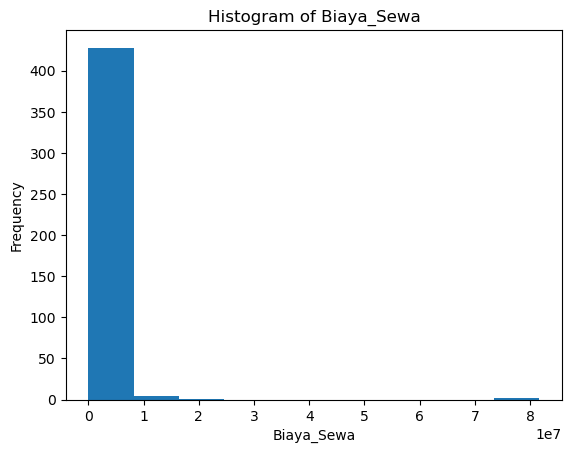

In [50]:
# Histogram of a Biaya_Sewa
plt.hist(data6['Biaya_Sewa'], bins=10)
plt.xlabel('Biaya_Sewa')
plt.ylabel('Frequency')
plt.title('Histogram of Biaya_Sewa')
plt.show()

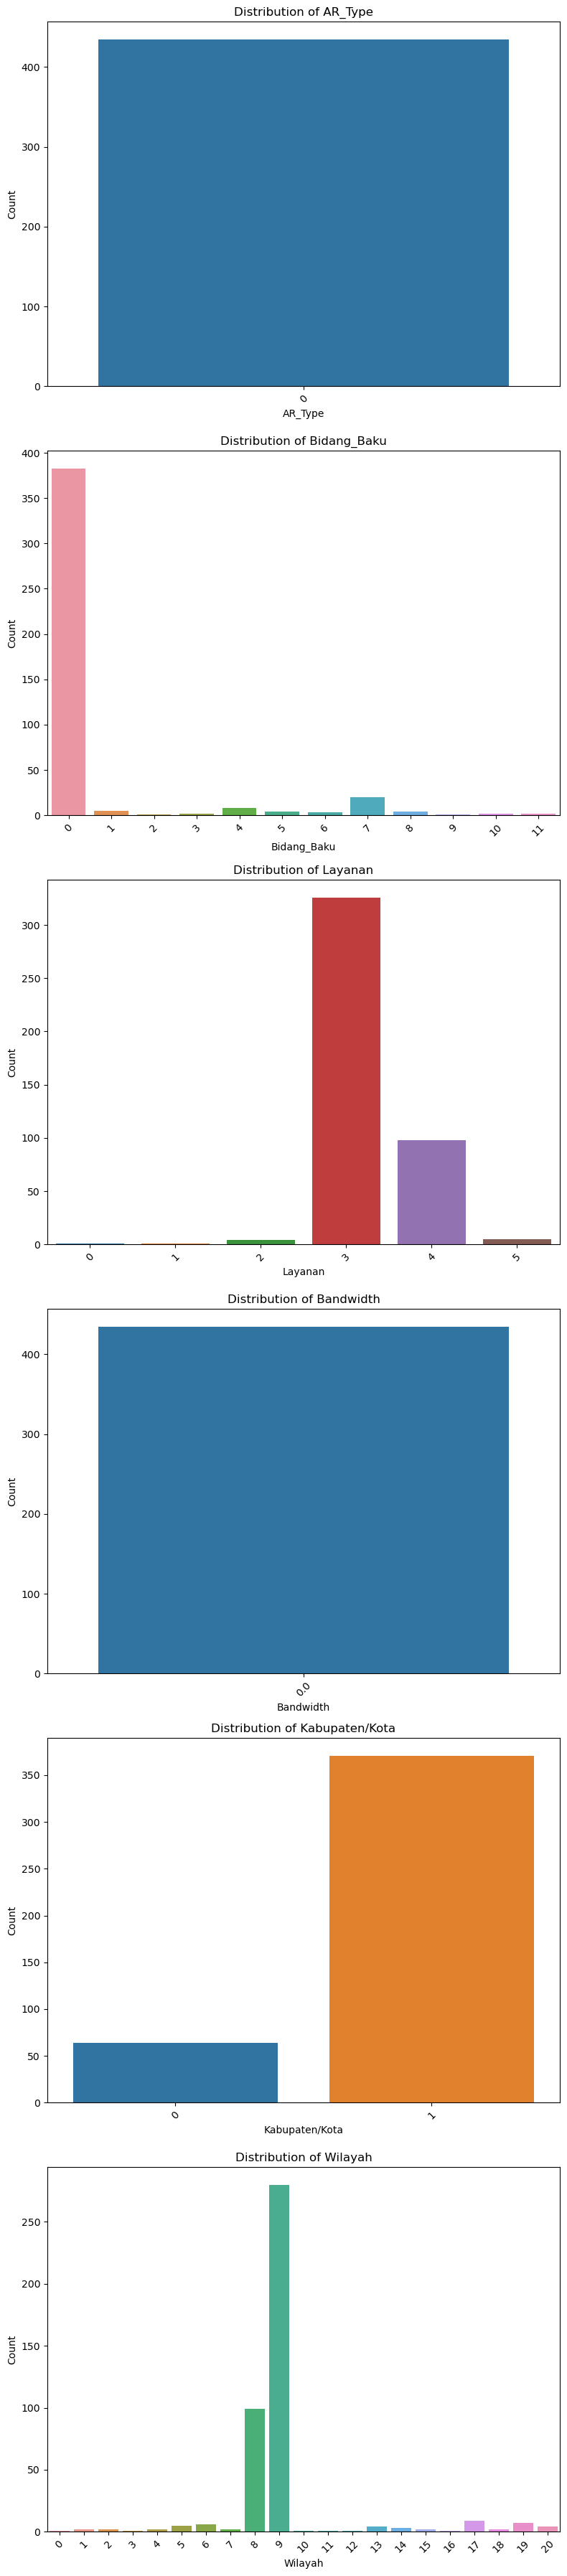

In [51]:
# Select the categorical variables
categorical_vars = ['AR_Type', 'Bidang_Baku', 'Layanan', 'Bandwidth', 'Kabupaten/Kota', 'Wilayah']

# Create subplots for each categorical variable
fig, axes = plt.subplots(len(categorical_vars), 1, figsize=(8, 6 * len(categorical_vars)))
for i, var in enumerate(categorical_vars):
    sns.countplot(x=var, data=data7, ax=axes[i])
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'Distribution of {var}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [52]:
# # Grouped bar chart
# fig, ax = plt.subplots()

# sns.catplot("Layanan", hue="AR_Type", data=data7, kind="object", ax=ax)

# plt.close(2) # catplot creates an extra figure we don't need

# ax.legend(title="Passenger Class")
# #ax.set_xticklabels(["did not survive", "survived"])
# ax.set_xlabel("")

# fig.suptitle("Layanan vs. AR Type");

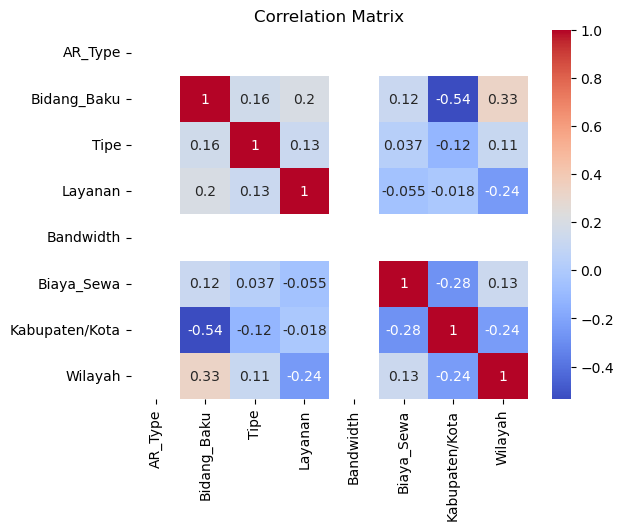

In [53]:
# Correlation matrix
correlation_matrix = data7.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

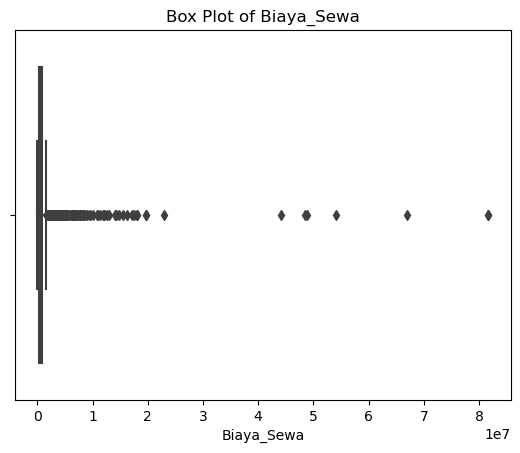

In [54]:
# Box plot of a Biaya_Sewa with potential outliers
sns.boxplot(x='Biaya_Sewa', data=data)
plt.xlabel('Biaya_Sewa')
plt.title('Box Plot of Biaya_Sewa')
plt.show()

## **Check Outliers**

In [55]:
# Fill NaN values with 0
data7 = data7.fillna(0)

# Check the updated dataset
print(data7.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435 entries, 217 to 1743
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AR_Type         435 non-null    int32  
 1   Bidang_Baku     435 non-null    int32  
 2   Tipe            435 non-null    int32  
 3   Layanan         435 non-null    int32  
 4   Bandwidth       435 non-null    float64
 5   Biaya_Sewa      435 non-null    float64
 6   Kabupaten/Kota  435 non-null    int32  
 7   Wilayah         435 non-null    int32  
dtypes: float64(2), int32(6)
memory usage: 20.4 KB
None


In [56]:
import pandas as pd
import numpy as np
from scipy import stats

# Select the numerical variables for outlier detection
numerical_vars = ['AR_Type', 'Bidang_Baku', 'Layanan', 'Bandwidth', 'Biaya_Sewa', 'Kabupaten/Kota', 'Wilayah']

# Detect outliers using z-score method
outliers = []
for var in numerical_vars:
    z_scores = stats.zscore(data7[var])
    threshold = 3  # Adjust this threshold as needed
    var_outliers = data7[np.abs(z_scores) > threshold]
    outliers.append(var_outliers)

# Concatenate the outliers for all variables
outliers = pd.concat(outliers)

# Print the outliers
print("Outliers:")
print(outliers)

Outliers:
      AR_Type  Bidang_Baku  Tipe  Layanan  Bandwidth  Biaya_Sewa  \
218         0            7     0        3        0.0   1800000.0   
269         0            7     0        3        0.0   1700000.0   
271         0            7     0        3        0.0    985000.0   
305         0            7     0        3        0.0   1600000.0   
309         0            7     0        3        0.0   1350000.0   
...       ...          ...   ...      ...        ...         ...   
1489        0            1     1        2        0.0         0.0   
1495        0            0     1        2        0.0   1500000.0   
1497        0            5     1        2        0.0   4100000.0   
1499        0            5     1        2        0.0   4100000.0   
1506        0            4     1        5        0.0   3200000.0   

      Kabupaten/Kota  Wilayah  
218                0        2  
269                0        6  
271                0        6  
305                0        8  
309          

## **Chi-Square Tests**

In [57]:
data7.columns

Index(['AR_Type', 'Bidang_Baku', 'Tipe', 'Layanan', 'Bandwidth', 'Biaya_Sewa',
       'Kabupaten/Kota', 'Wilayah'],
      dtype='object')

**AR_Type**

In [58]:
cross_tab1 = pd.crosstab(data7['AR_Type'], data7['Layanan'])
cross_tab1

Layanan,0,1,2,3,4,5
AR_Type,,,,,,
0,1,1,4,326,98,5


In [59]:
chi_sq, p_val, dof, con_table = stats.chi2_contingency(cross_tab1)
print(f'chi-squared = {chi_sq}')
print(f'p-value= {p_val}')
print(f'degrees of freedom = {dof}')

chi-squared = 0.0
p-value= 1.0
degrees of freedom = 0


**Bidang Baku**

In [60]:
cross_tab2 = pd.crosstab(data7['Bidang_Baku'], data7['Layanan'])
cross_tab2

Layanan,0,1,2,3,4,5
Bidang_Baku,,,,,,
0,1,1,1,304,75,1
1,0,0,1,1,3,0
2,0,0,0,0,1,0
3,0,0,0,1,1,0
4,0,0,0,2,2,4
5,0,0,2,0,2,0
6,0,0,0,2,1,0
7,0,0,0,14,6,0
8,0,0,0,2,2,0


In [61]:
chi_sq, p_val, dof, con_table = stats.chi2_contingency(cross_tab2)
print(f'chi-squared = {chi_sq}')
print(f'p-value= {p_val}')
print(f'degrees of freedom = {dof}')

chi-squared = 334.64654680369966
p-value= 1.0272829581340998e-41
degrees of freedom = 55


**Tipe**

In [62]:
cross_tab2 = pd.crosstab(data7['Tipe'], data7['Layanan'])
cross_tab2

Layanan,0,1,2,3,4,5
Tipe,,,,,,
0,1,1,0,326,98,0
1,0,0,4,0,0,5


In [63]:
chi_sq, p_val, dof, con_table = stats.chi2_contingency(cross_tab2)
print(f'chi-squared = {chi_sq}')
print(f'p-value= {p_val}')
print(f'degrees of freedom = {dof}')

chi-squared = 435.0
p-value= 8.442956551179387e-92
degrees of freedom = 5


**Bandwidth**

In [64]:
cross_tab3 = pd.crosstab(data7['Bandwidth'], data7['Layanan'])
cross_tab3

Layanan,0,1,2,3,4,5
Bandwidth,,,,,,
0.0,1,1,4,326,98,5


In [65]:
chi_sq, p_val, dof, con_table = stats.chi2_contingency(cross_tab3)
print(f'chi-squared = {chi_sq}')
print(f'p-value= {p_val}')
print(f'degrees of freedom = {dof}')

chi-squared = 0.0
p-value= 1.0
degrees of freedom = 0


**Biaya_Sewa**

In [66]:
cross_tab4 = pd.crosstab(data7['Biaya_Sewa'], data7['Layanan'])
cross_tab4

Layanan,0,1,2,3,4,5
Biaya_Sewa,,,,,,
0.00,0,0,1,8,2,0
297297.30,0,0,0,274,0,0
400000.00,0,0,0,2,0,0
500000.00,0,0,0,1,0,0
520000.00,0,0,0,1,0,0
800000.00,0,0,0,1,70,0
815384.61,0,0,0,11,0,0
815385.61,0,0,0,1,0,0
900000.00,0,0,0,2,0,0


In [67]:
chi_sq, p_val, dof, con_table = stats.chi2_contingency(cross_tab4)
print(f'chi-squared = {chi_sq}')
print(f'p-value= {p_val}')
print(f'degrees of freedom = {dof}')

chi-squared = 1543.592671077056
p-value= 4.825081465131569e-181
degrees of freedom = 260


**Kabupaten/Kota**

In [68]:
cross_tab5 = pd.crosstab(data7['Kabupaten/Kota'], data7['Layanan'])
cross_tab5

Layanan,0,1,2,3,4,5
Kabupaten/Kota,,,,,,
0,1,1,2,39,19,2
1,0,0,2,287,79,3


In [69]:
chi_sq, p_val, dof, con_table = stats.chi2_contingency(cross_tab5)
print(f'chi-squared = {chi_sq}')
print(f'p-value= {p_val}')
print(f'degrees of freedom = {dof}')

chi-squared = 21.782118878445328
p-value= 0.0005759562684671286
degrees of freedom = 5


**Wilayah**

In [70]:
cross_tab6 = pd.crosstab(data7['Wilayah'], data7['Layanan'])
cross_tab6

Layanan,0,1,2,3,4,5
Wilayah,,,,,,
0,0,0,0,1,0,0
1,0,0,0,0,1,1
2,0,0,0,1,1,0
3,0,0,0,0,1,0
4,0,0,0,1,0,1
5,0,1,0,2,1,1
6,0,0,0,2,3,1
7,0,0,0,2,0,0
8,0,0,0,21,78,0


In [71]:
chi_sq, p_val, dof, con_table = stats.chi2_contingency(cross_tab6)
print(f'chi-squared = {chi_sq}')
print(f'p-value= {p_val}')
print(f'degrees of freedom = {dof}')

chi-squared = 827.4668953662255
p-value= 6.421535552068502e-115
degrees of freedom = 100


## **Save the DataFrame**

#**Modeling**

## Split Data

In [72]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression as LR
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression #digunakan untuk membuat model multinomial logistic regression
from sklearn.naive_bayes import GaussianNB #digunakan untuk membuat model naive bayes
from sklearn.tree import DecisionTreeClassifier #digunakan untuk membuat model decision tree
from sklearn.ensemble import RandomForestClassifier #digunakan untuk membuat model random forest
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import joblib

In [73]:
# Load the data into a DataFrame
df = pd.DataFrame(data7)

# Split the data into training and testing sets
X = df.drop('Layanan', axis=1)
y = df['Layanan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

## Data Imbalance

In [74]:
pd.Series(y_train).value_counts(normalize=True)

3    0.741379
4    0.232759
5    0.011494
2    0.011494
0    0.002874
Name: Layanan, dtype: float64

It is clear that train set is imbalanced. I will build first model with this data and later on try to balance it using SMOTE.

## Baseline Model - Multinomial Logistic Regression

In [75]:
cat_cols = X_train.select_dtypes(include='object').columns
indices = []
for col in cat_cols:
    indices.append(X_train.columns.get_loc(col))
indices

[]

In [76]:
transformer = ColumnTransformer(transformers=[('categorical',
                                               OneHotEncoder(handle_unknown = 'ignore'), indices)],
                                remainder = 'passthrough')

In [77]:
# Perform multinomial logistic regression
lr = LogisticRegression(multi_class='multinomial', solver='newton-cg', max_iter=20000)

# Create the pipeline including the transformer, scaler, and logistic regression model
base_model_pipe = make_pipeline(transformer, StandardScaler(with_mean=False), lr)

# Fit the pipeline on the training data
base_model_pipe.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = base_model_pipe.predict(X_test)
y_train_pred = base_model_pipe.predict(X_train)

# Calculate the accuracy of the model
train_accuracy = accuracy_score(y_train, y_train_pred) * 100
test_accuracy = accuracy_score(y_test, y_test_pred) * 100
print("Train Set Accuracy: {:.2f}%".format(train_accuracy))
print("Test Set Accuracy: {:.2f}%".format(test_accuracy))

# Confusion matrix and classification report
print("\nConfusion Matrix:\n{}".format(confusion_matrix(y_test, y_test_pred)))
print("\nClassification Report:\n{}".format(classification_report(y_test, y_test_pred)))

Train Set Accuracy: 80.46%
Test Set Accuracy: 81.61%

Confusion Matrix:
[[ 0  0  1  0]
 [ 0 66  2  0]
 [ 0 13  4  0]
 [ 0  0  0  1]]

Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           3       0.84      0.97      0.90        68
           4       0.57      0.24      0.33        17
           5       1.00      1.00      1.00         1

    accuracy                           0.82        87
   macro avg       0.60      0.55      0.56        87
weighted avg       0.78      0.82      0.78        87



c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [78]:
residuals = y_train == y_train_pred

print('Number of values correctly predicted:')
print(pd.Series(residuals).value_counts())

Number of values correctly predicted:
True     280
False     68
Name: Layanan, dtype: int64


In [79]:
residuals = y_test == y_test_pred

print('Number of values correctly predicted:')
print(pd.Series(residuals).value_counts())

Number of values correctly predicted:
True     71
False    16
Name: Layanan, dtype: int64


## Multinomial Logistic Regression with Upsampled Data

In [80]:
print(X.columns)

Index(['AR_Type', 'Bidang_Baku', 'Tipe', 'Bandwidth', 'Biaya_Sewa',
       'Kabupaten/Kota', 'Wilayah'],
      dtype='object')


In [81]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate the minimum number of samples (n_samples) among the 199 classes
n_samples = min([len(X_train[y_train == i]) for i in range(199)])

# Choose a value for the n_neighbors parameter
n_neighbors = 5  # Adjust this value as needed

# Apply SMOTE if n_neighbors <= n_samples, otherwise apply RandomOverSampler
if n_neighbors <= n_samples:
    oversampler = SMOTE(sampling_strategy='not majority', k_neighbors=n_neighbors)
else:
    oversampler = RandomOverSampler(sampling_strategy='not majority')

# Apply oversampling to the training data
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)

# Create the logistic regression model
lr = LogisticRegression(multi_class='multinomial', solver='newton-cg', max_iter=20000)

# Fit the logistic regression model on the preprocessed training data
lr.fit(X_train_oversampled, y_train_oversampled)

# Make predictions on the test set
y_test_pred = lr.predict(X_test)
y_train_pred = lr.predict(X_train_oversampled)

# Calculate the accuracy of the model
train_accuracy = accuracy_score(y_train_oversampled, y_train_pred) * 100
test_accuracy = accuracy_score(y_test, y_test_pred) * 100
print("Train Set Accuracy: {:.2f}%".format(train_accuracy))
print("Test Set Accuracy: {:.2f}%".format(test_accuracy))

# Confusion matrix and classification report
print("\nConfusion Matrix:\n{}".format(confusion_matrix(y_test, y_test_pred)))
print("\nClassification Report:\n{}".format(classification_report(y_test, y_test_pred)))

# Save the trained model as a .pkl file
joblib.dump(lr, 'lr_model.pkl')

c:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


Train Set Accuracy: 97.03%
Test Set Accuracy: 83.91%

Confusion Matrix:
[[ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  5 54  3  0]
 [ 1  1  1  1 17  1]
 [ 0  0  0  0  0  2]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           3       0.96      0.87      0.92        62
           4       0.85      0.77      0.81        22
           5       0.67      1.00      0.80         2

    accuracy                           0.84        87
   macro avg       0.41      0.44      0.42        87
weighted avg       0.92      0.84      0.88        87



c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this beha

['lr_model.pkl']

In [82]:
residuals = y_train_oversampled == y_train_pred

print('Number of values correctly predicted:')
print(pd.Series(residuals).value_counts())

Number of values correctly predicted:
True     1537
False      47
Name: Layanan, dtype: int64


## Feature Importance Logistic Regression

In [83]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348 entries, 458 to 501
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AR_Type         348 non-null    int32  
 1   Bidang_Baku     348 non-null    int32  
 2   Tipe            348 non-null    int32  
 3   Bandwidth       348 non-null    float64
 4   Biaya_Sewa      348 non-null    float64
 5   Kabupaten/Kota  348 non-null    int32  
 6   Wilayah         348 non-null    int32  
dtypes: float64(2), int32(5)
memory usage: 15.0 KB


In [84]:
import statsmodels.api as sm
formula = 'AR_Type', 'Bidang_Baku', 'Tipe', 'Bandwidth', 'Biaya_Sewa','Kabupaten/Kota', 'Wilayah'
lm = sm.OLS(formula, data7).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

ValueError: endog and exog matrices are different sizes

In [85]:
dtc = DecisionTreeClassifier(criterion='entropy', splitter='best')

# Create the pipeline including the transformer, scaler, and logistic regression model
base_model_pipe_dtc = make_pipeline(StandardScaler(with_mean=False), dtc)

# Fit the pipeline on the training data
base_model_pipe_dtc.fit(X_train_oversampled, y_train_oversampled)

y_test_pred3 = base_model_pipe_dtc.predict(X_test)
y_train_pred3 = base_model_pipe_dtc.predict(X_train_oversampled)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred3,y_train_oversampled)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred3,y_test)*100))

#Confusion matrix and classification report
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred3,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred3,y_test))

# Save the trained model as a .pkl file
joblib.dump(base_model_pipe_dtc, 'dtc_model.pkl')

Train Set Accuracy:100.0
Test Set Accuracy:95.40229885057471

Confusion Matrix:
[[ 0  0  0  0  1  0]
 [ 0  0  0  0  1  0]
 [ 0  0  1  0  0  0]
 [ 0  0  0 62  2  0]
 [ 0  0  0  0 18  0]
 [ 0  0  0  0  0  2]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       1.00      1.00      1.00         1
           3       1.00      0.97      0.98        64
           4       0.82      1.00      0.90        18
           5       1.00      1.00      1.00         2

    accuracy                           0.95        87
   macro avg       0.64      0.66      0.65        87
weighted avg       0.94      0.95      0.94        87



c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


['dtc_model.pkl']

In [86]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

# Create the pipeline including the transformer, scaler, and logistic regression model
base_model_pipe_mnb = make_pipeline(StandardScaler(with_mean=False), mnb)

# Fit the pipeline on the training data
base_model_pipe_mnb.fit(X_train, y_train)

y_test_pred2 = base_model_pipe_mnb.predict(X_test)
y_train_pred2= base_model_pipe_mnb.predict(X_train)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred2,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred2,y_test)*100))

#Confusion matrix and classification report
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred2,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred2,y_test))

# Save the trained model as a .pkl file
joblib.dump(base_model_pipe_mnb, 'mnb_model.pkl')

Train Set Accuracy:77.87356321839081
Test Set Accuracy:77.01149425287356

Confusion Matrix:
[[ 0  0  0  1  0]
 [ 0  1  0  0  0]
 [ 0  0 61 18  0]
 [ 0  0  1  3  0]
 [ 0  0  0  0  2]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           2       1.00      1.00      1.00         1
           3       0.98      0.77      0.87        79
           4       0.14      0.75      0.23         4
           5       1.00      1.00      1.00         2

    accuracy                           0.77        87
   macro avg       0.62      0.70      0.62        87
weighted avg       0.93      0.77      0.83        87



c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


['mnb_model.pkl']

## Evaluation

In [ ]:
# from sklearn.metrics import roc_curve, roc_auc_score


# y_pred_proba = lr.predict_proba(np.array(X_test))[:,1]

# fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# sns.set()

# plt.plot(fpr, tpr)

# plt.plot(fpr, fpr, linestyle = '--', color = 'k')

# plt.xlabel('False positive rate')

# plt.ylabel('True positive rate')

# AUROC = np.round(roc_auc_score(y_test, y_pred_proba), 2)

# plt.title(f'Logistic Regression Model ROC curve; AUROC: {AUROC}');

# plt.show()

In [ ]:
# # Importing all necessary libraries
# from sklearn.metrics import roc_curve, auc

# class_probabilities = lr.predict_proba(X_test)
# preds = class_probabilities[:, 1]

# fpr, tpr, threshold = roc_curve(y_test, preds)
# roc_auc = auc(fpr, tpr)

# # Printing AUC
# print(f"AUC for our classifier is: {roc_auc}")

# # Plotting the ROC
# plt.title('Receiver Operating Characteristic')
# plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
# plt.legend(loc = 'lower right')
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()

In [ ]:
# # Perform cross-validation
# cv_scores = cross_val_score(lr, X, y, cv=5)

# # Print the cross-validation scores
# print('Cross-Validation Scores:', cv_scores)
# print('Average Accuracy:', cv_scores.mean())